In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [2]:
df=pd.read_csv('train data.csv',encoding ="ISO-8859-1", names=["Sentiment", "Comment_ID", "Date", "Flag", "Username", "Comment"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentiment   1600000 non-null  int64 
 1   Comment_ID  1600000 non-null  int64 
 2   Date        1600000 non-null  object
 3   Flag        1600000 non-null  object
 4   Username    1600000 non-null  object
 5   Comment     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
df.head()


,Sentiment,Comment_ID,Date,Flag,Username,Comment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"} #dictionary
def decode_sentiment(label):
    return decode_map[int(label)]
df['Sentiment']=df['Sentiment'].apply(lambda x :decode_sentiment(x))

In [6]:
df.head(10)

,Sentiment,Comment_ID,Date,Flag,Username,Comment
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,NEGATIVE,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,NEGATIVE,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,NEGATIVE,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,NEGATIVE,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,NEGATIVE,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


<BarContainer object of 2 artists>

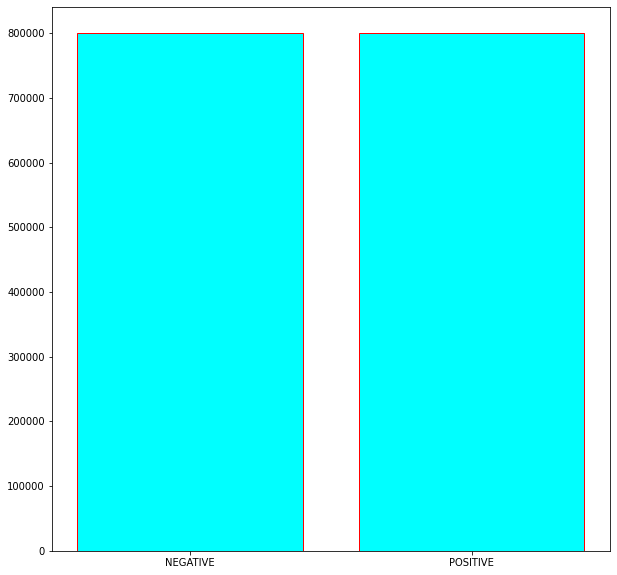

In [7]:
from collections import Counter
senti_dict= Counter(df.Sentiment)
plt.figure(figsize=(10,10))
plt.bar(senti_dict.keys(),senti_dict.values(),facecolor='cyan',edgecolor='red')

In [8]:
# cleaning the extra column
df['Flag'].value_counts()
df=df.drop('Flag',axis=1)

In [9]:
import nltk
import re
nltk.download('stopwords')
  
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(text).lower()).strip()
    tokens = []
    # Removing stopwords
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)



In [11]:
n=input()
print(preprocess(n))

KeyboardInterrupt: Interrupted by user

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.35, random_state=42)


In [13]:
df_train.head()

,Sentiment,Comment_ID,Date,Username,Comment
999373,POSITIVE,1836456577,Mon May 18 08:01:53 PDT 2009,kongtemplation,"@gershbec well, we'll see, it's our first time..."
748282,NEGATIVE,2284253748,Mon Jun 22 13:39:23 PDT 2009,ElodieCarter,@ddlovato oh I'm so sorry!!!!!!I hope you will...
471613,NEGATIVE,2176662092,Mon Jun 15 04:27:05 PDT 2009,RealJackieB,@MeganJoan OMG YUMM!! lol...my god why wont he...
1430454,POSITIVE,2059913093,Sat Jun 06 17:53:25 PDT 2009,wordtoyermadi,I actually ate a baked potato and some cake. I...
1415422,POSITIVE,2057224898,Sat Jun 06 12:36:17 PDT 2009,Restrictor,"@claireliz81 No, you're watching live baseball..."


In [14]:
df_test.head()

,Sentiment,Comment_ID,Date,Username,Comment
541200,NEGATIVE,2200003196,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,NEGATIVE,1467998485,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,NEGATIVE,2300048954,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,NEGATIVE,1993474027,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,NEGATIVE,2256550904,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


In [15]:
documents = [_text.split() for _text in df_train.Comment] 
len(documents) #list of list of all nonstopwords in a tweet.

1040000

In [16]:
res = [''.join(ele) for ele in df.Comment]

document=str(' '.join(res))

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(document)
  

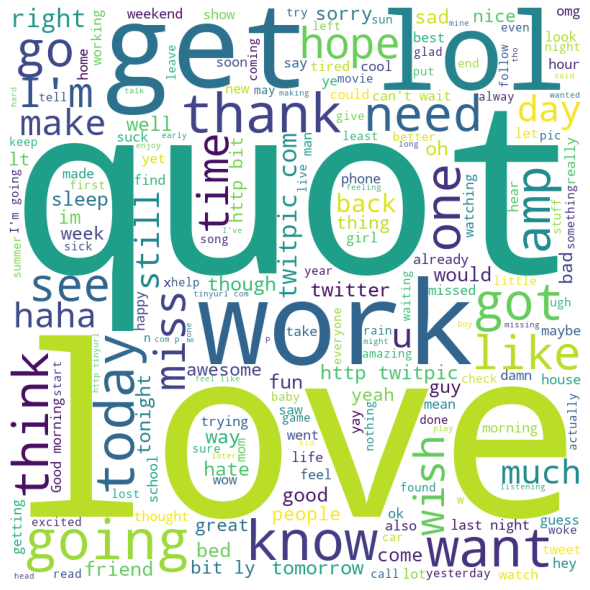

In [18]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [19]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


In [20]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=8, 
                                            min_count=15, 
                                            workers=8)

In [21]:
w2v_model.build_vocab(documents)


In [22]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)
print(words)

Vocab size 35851
dict_keys(['well,', "we'll", 'see,', "it's", 'our', 'first', 'time', 'offering', 'it', 'lots', 'of', 'people', 'signed', 'up', 'though.', '@ddlovato', 'oh', "I'm", 'so', 'hope', 'you', 'will', 'be', 'better', 'unfair', '!', 'OMG', 'god', 'why', 'wont', 'he', 'make', 'out', 'with', 'me!?', 'LOL', 'I', 'actually', 'ate', 'a', 'baked', 'potato', 'and', 'some', 'cake.', 'did', 'good', 'tonight', 'now', 'very', 'tired.', 'No,', "you're", 'watching', 'live', 'baseball', 'instead', 'NW', 'yea', 'that', 'would', 'nice', 'gonna', 'lie', 'beat', 'Out.', 'Sadly,', 'was', 'really', 'looking', 'forward', 'to', "It's", 'also', 'games', "don't", 'work.', 'i', 'wish', 'could', 'see', 'u', 'but', 'im', 'going', 'miley', 'metro', 'station', 'sorry', 'def.', 'not', 'pro', 'enough', 'give', 'advanced', 'tips', 'need', 'block', 'more', 'jump', 'much.', 'You', 'though!', 'stuck', 'in', 'the', 'office', 'on', 'this', 'glorious', 'for', 'no', 'Feelin', 'like', 'Sitting', 'class', 'doing', 'th

In [23]:
w2v_model.train(documents, total_examples=len(documents), epochs=9)


(88081709, 123329529)

In [24]:
w2v_model.most_similar("weeks")


<ipython-input-24-765eb73050dd>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model.most_similar("weeks")


[('months', 0.8665446639060974),
 ('days', 0.827426016330719),
 ('weeks,', 0.7780685424804688),
 ('weeks.', 0.776294469833374),
 ('weeks!', 0.771864116191864),
 ('wks', 0.7689679861068726),
 ('months,', 0.7355952262878418),
 ('months.', 0.7325726747512817),
 ('years', 0.7273715138435364),
 ('days,', 0.7131127119064331)]

In [39]:
w2v_model.save("w2v_model")

In [25]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = 'NEUTRAL'
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = 'NEGATIVE'
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = 'POSITIVE'

        return label
    else:
        return 'NEGATIVE' if score < 0.5 else 'POSITIVE'


In [58]:
accuracy_score(y_test_1d, y_pred_1d)

0.77805625

In [26]:
import pickle
model=pickle.load(open('Sentiment-LR.pickle', 'rb'))
vectoriser=pickle.load(open('vectoriser-ngram-(1,2).pickle', 'rb'))

In [ ]:
print(predict(input()))

In [28]:
def predict(text):
    # Predict the sentiment
    x=preprocess(text)
    textdata = vectoriser.transform([x])
    sentiment = model.predict(textdata)
    if(sentiment==1.0):
        sentiment ='Positive'
    else :
        sentiment="Negative"
    return sentiment

In [29]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(text).lower()).strip()
    tokens = []
    # Removing stopwords
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
